**Data Merging**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
schedule = pd.read_csv("match_log_schedule.csv")
schedule.rename(columns = {'Unnamed: 0':'league',	'Unnamed: 1':'season','Unnamed: 2':'team','Unnamed: 3':'game'}, inplace = True)
#match_stata.drop(index=[0,1], inplace = True)
schedule.drop('league', axis = 1, inplace = True)
schedule.reset_index(inplace = True,drop = True)
schedule

,season,team,game,date,time,round,day,venue,result,GF,...,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,match_report,Notes
0,2223,Ajaccio,2023-01-08 Jura Sud Foot-Ajaccio,2023-01-08,15:30:00,Round of 64,Sun,Away,W,2,...,NaN,NaN,55.0,1957.0,Vincent Marchetti,4-2-3-1,4-2-3-1,Stéphanie Frappart,/en/matches/9e1109e9/Jura-Sud-Foot-Ajaccio-Jan...,NaN
1,2223,Ajaccio,2023-01-21 Toulouse-Ajaccio,2023-01-21,18:00:00,Round of 32,Sat,Away,L,0,...,NaN,NaN,37.0,18708.0,Riad Nouri,4-4-2,4-3-3,François Letexier,/en/matches/c9a9802b/Toulouse-Ajaccio-January-...,NaN
2,1718,Alavés,2017-10-24 Getafe-Alavés,2017-10-24,20:30:00,Round of 32,Tue,Away,W,1,...,NaN,NaN,NaN,7731.0,NaN,NaN,NaN,David Fernández,/en/matches/6a0efeb3/Getafe-Alaves-October-24-...,Leg 1 of 2
3,1718,Alavés,2017-11-30 Alavés-Getafe,2017-11-30,19:00:00,Round of 32,Thu,Home,W,3,...,NaN,NaN,NaN,9128.0,NaN,NaN,NaN,José González,/en/matches/00b829fc/Alaves-Getafe-November-30...,Leg 2 of 2; Alavés won
4,1718,Alavés,2018-01-03 SD Formentera-Alavés,2018-01-03,19:00:00,Round of 16,Wed,Away,W,3,...,NaN,NaN,NaN,1100.0,NaN,NaN,NaN,Alejandro Hernández,/en/matches/b7c26577/SD-Formentera-Alaves-Janu...,Leg 1 of 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,2324,Wolves,2024-01-28 West Brom-Wolves,2024-01-28,11:45:00,Fourth round proper,Sun,Away,W,2,...,NaN,NaN,49.0,25013.0,Max Kilman,3-4-3,4-1-4-1,Thomas Bramall,/en/matches/2a3327b0/West-Bromwich-Albion-Wolv...,NaN
10411,2324,Wolves,2024-02-28 Wolves-Brighton,2024-02-28,19:45:00,Fifth round proper,Wed,Home,W,1,...,NaN,NaN,28.0,23822.0,Max Kilman,3-4-1-2,3-4-3,Andy Madley,/en/matches/f890fce5/Wolverhampton-Wanderers-B...,NaN
10412,2324,Wolves,2024-03-16 Wolves-Coventry City,2024-03-16,12:15:00,Quarter-finals,Sat,Home,L,2,...,NaN,NaN,58.0,31262.0,Max Kilman,3-4-3,4-2-3-1,Samuel Barrott,/en/matches/3650b3eb/Wolverhampton-Wanderers-C...,NaN
10413,2425,Wolves,2024-08-28 Wolves-Burnley,2024-08-28,19:30:00,Second round,Wed,Home,W,2,...,NaN,NaN,50.0,19236.0,Craig Dawson,4-2-3-1,4-4-1-1,Joshua Smith,/en/matches/c881bced/Wolverhampton-Wanderers-B...,NaN


In [5]:
names = ['defense','gscreation','keeper','passing','passtypes','possession','shooting']

In [6]:
match_stats = schedule.copy()

In [7]:
for i in names:
  d = pd.read_csv("match_log_"+i+".csv")
  d.rename(columns = {'Unnamed: 0':'league',	'Unnamed: 1':'season','Unnamed: 2':'team','Unnamed: 3':'game'}, inplace = True)
  d.drop(index=[0,1], inplace = True)
  d.drop('league', axis = 1, inplace = True)
  d.reset_index(inplace = True,drop = True)
  match_stats = pd.merge(match_stats, d, on = ['game','team'], suffixes=('_x', '_y'), how = 'left')
  match_stats = match_stats.loc[:, ~match_stats.columns.str.endswith('_y')]
  match_stats.rename(columns=lambda x: x.replace('_x', '') if '_x' in x else x, inplace=True)

In [8]:
d = pd.read_csv("match_log_misc.csv")
d.rename(columns = {'Unnamed: 0':'league',	'Unnamed: 1':'season','Unnamed: 2':'team','Unnamed: 3':'game','Performance':'yellow','Performance.1':'red','Performance.2':'sec_yel','Performance.3':'fouls_com','Performance.4':'fouls_drw','Performance.5':'offside','Performance.6':'crosses','Performance.7':'intercep','Performance.8':'tackles won','Performance.9':'PKwon','Performance.10':'PKcon','Performance.11':'OwnGoals','Performance.12':'BallRecov'}, inplace = True)
d.drop(index=[0,1], inplace = True)
d.drop('league', axis = 1, inplace = True)
d.reset_index(inplace = True,drop = True)
match_stats = pd.merge(match_stats, d, on = ['game','team'], suffixes=('_x', '_y'), how = 'left')
match_stats = match_stats.loc[:, ~match_stats.columns.str.endswith('_y')]
match_stats.rename(columns=lambda x: x.replace('_x', '') if '_x' in x else x, inplace=True)

In [9]:
match_stats

,season,team,game,date,time,round,day,venue,result,GF,...,crosses,intercep,tackles won,PKwon,PKcon,OwnGoals,BallRecov,Aerial Duels,Aerial Duels.1,Aerial Duels.2
0,2223,Ajaccio,2023-01-08 Jura Sud Foot-Ajaccio,2023-01-08,15:30:00,Round of 64,Sun,Away,W,2,...,17,10,9,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2223,Ajaccio,2023-01-21 Toulouse-Ajaccio,2023-01-21,18:00:00,Round of 32,Sat,Away,L,0,...,11,16,12,NaN,NaN,0,NaN,NaN,NaN,NaN
2,1718,Alavés,2017-10-24 Getafe-Alavés,2017-10-24,20:30:00,Round of 32,Tue,Away,W,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,1718,Alavés,2017-11-30 Alavés-Getafe,2017-11-30,19:00:00,Round of 32,Thu,Home,W,3,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,1718,Alavés,2018-01-03 SD Formentera-Alavés,2018-01-03,19:00:00,Round of 16,Wed,Away,W,3,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,2324,Wolves,2024-01-28 West Brom-Wolves,2024-01-28,11:45:00,Fourth round proper,Sun,Away,W,2,...,14,19,4,NaN,NaN,0,NaN,NaN,NaN,NaN
10411,2324,Wolves,2024-02-28 Wolves-Brighton,2024-02-28,19:45:00,Fifth round proper,Wed,Home,W,1,...,10,7,11,NaN,NaN,0,NaN,NaN,NaN,NaN
10412,2324,Wolves,2024-03-16 Wolves-Coventry City,2024-03-16,12:15:00,Quarter-finals,Sat,Home,L,2,...,26,8,15,NaN,NaN,0,NaN,NaN,NaN,NaN
10413,2425,Wolves,2024-08-28 Wolves-Burnley,2024-08-28,19:30:00,Second round,Wed,Home,W,2,...,16,12,18,NaN,NaN,0,NaN,NaN,NaN,NaN


In [10]:
match_stats.to_csv('match_stats.csv')

Обработка данных

In [ ]:
#match_stats = pd.read_csv("match_stats.csv")

In [11]:
### Description
description = match_stats.describe(include = 'all')
description.to_csv("dataset_descr.csv")

In [12]:
description

,season,team,game,date,time,round,day,venue,result,GF,...,crosses,intercep,tackles won,PKwon,PKcon,OwnGoals,BallRecov,Aerial Duels,Aerial Duels.1,Aerial Duels.2
count,10415.000000,10415,10415,10415,10034,10415,10415,10415,9745,9746,...,9255,9255,9255,7062,7062,9651,6706,6706,6706,6706
unique,NaN,148,6720,1507,72,66,7,3,3,58,...,62,32,31,4,4,3,74,49,47,408
top,NaN,Bayern Munich,2018-01-24 Paris S-G-Guingamp,2023-11-01,15:30:00,Group stage,Sat,Away,W,1,...,15,8,9,0,0,0,53,12,11,50.0
freq,NaN,391,2,31,2811,1386,3570,5333,4541,2798,...,509,839,952,6217,6080,9295,281,417,419,428
mean,2058.888334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,228.094321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1718.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1819.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2223.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
### NAs
match_stats.isna().sum()

,0
season,0
team,0
game,0
date,0
time,381
...,...
OwnGoals,764
BallRecov,3709
Aerial Duels,3709
Aerial Duels.1,3709


In [14]:
#количество NaN строк
na_share = match_stats.isna().sum()/10415

In [15]:
shares = na_share.sort_values(ascending = False)

In [16]:
#average density of dataset
print(f"Share of nas:{shares.mean()}", f"Share of values: {1-shares.mean()}", sep = '\n')

Share of nas:0.27470166655236267
Share of values: 0.7252983334476373


Dataset density can be assessed as 0,72 out of 1, which means that dataset sparsity is medium.

Две основные гипотезы присутствия NaN
1. В датасете присутствует часть schedule (раписание), которая включает в себя все матчи, в том числе и еще не состоявшиеся (т.к. мы смотрим на сезон 2024-2025). Решить проблему можно, выкинув все строки, которые находятся "в будущем" относительно сегодняшнего дня.
2. Не все статистики доступны для всех команд, для более популярных матчей, скорее всего, статистик будет больше, чем для менее популярных (можно определить по аттрибуту attendance). Например, в датасете есть такие матчи, запись о посещамости которых даже неизвестна. В таком случае эти NA не отработать, так как они буквально означают отсутствие записи данных о матче.
3. Возможно, есть колонки, в которых NA может быть отдельным значением - необходимо это проверить.

In [17]:
#1
match_stats = match_stats[match_stats['date']<'2024-11-04']

In [18]:
#Доля density увеличилась за счет выкидывания строк несостоявшихся матчей
na_share1 = match_stats.count()/len(match_stats)
na_share1.mean()

0.7697283784574002

In [19]:
#2
match_stats_num = match_stats.select_dtypes(include=['number']).columns

In [20]:
#создаем словарь для каждой такой колонки и прописываем правило.
# для всех числовых, кроме Att мы берем count, чтобы посмотреть на количество значений.
# Для Att берем среднее, чтобы получить среднюю посещаемость матчей
d = {}
for i in match_stats_num:
  if i != "Attendance":
    d[i] = 'count'
  else:
    d[i] = 'mean'

In [21]:
t = match_stats.groupby(by = 'team')[match_stats_num].agg(d).sort_values(by = 'Attendance', ascending = False)
t

,season,xG,xGA,Poss,Attendance,Int,Tkl+Int,Clr,Err,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att
team,,,,,,,,,,,,,,,,,,
Dortmund,346,314,314,344,54668.871972,344,345,314,314,345,314,314,314,314,314,314,314,314
Manchester Utd,134,74,74,134,54667.192661,134,134,74,74,134,74,74,74,74,74,74,74,74
Bayern Munich,361,322,322,359,53625.721088,359,360,322,322,360,322,322,322,322,322,322,322,322
Barcelona,120,72,72,108,53511.570000,109,120,72,72,120,72,72,72,72,72,72,72,72
Real Madrid,126,82,82,116,51192.853211,117,126,82,82,126,82,82,82,82,82,82,82,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Parma,8,0,0,4,3838.000000,7,8,0,0,8,0,0,0,0,0,0,0,0
Venezia,4,0,0,4,3134.000000,4,4,0,0,4,0,0,0,0,0,0,0,0
Almería,3,0,0,3,2706.000000,3,3,0,0,3,0,0,0,0,0,0,0,0


<Axes: xlabel='Attendance', ylabel='Att'>

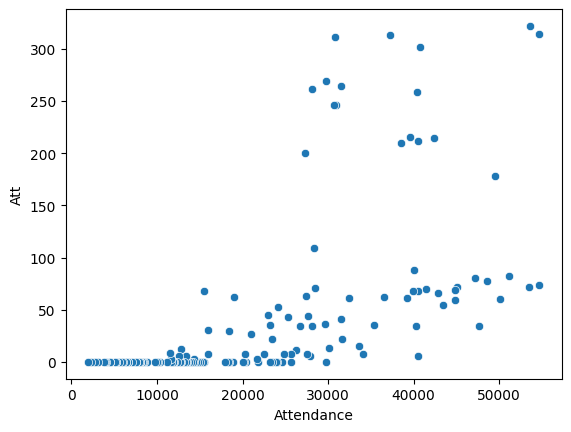

In [22]:
sns.scatterplot(data=t,x='Attendance', y='Att')

Видно, что вторая гипотеза не может быть частично доказана. Действительно, для команд, чьи игры в среднем посещаются меньше, будут иметь меньше статистик. Начиная с определенного уровня посещаемости матей команды число статистик растет

3. NA не имеют под собой адекватного значения, нет значений "флагов". NA возникают только в случае отсутствия данных

In [393]:
# Обработка NaN
match_stats.dropna()
# Если удалим все строки, в которых встречаются NaN - останется очень маленькая выборка
# Удалим только те, в которых доля NA наибольшая

,season,team,game,date,time,round,day,venue,result,GF,...,crosses,intercep,tackles won,PKwon,PKcon,OwnGoals,BallRecov,Aerial Duels,Aerial Duels.1,Aerial Duels.2
138,1718,Arsenal,2018-02-15 Östersund-Arsenal,2018-02-15,19:00:00,Round of 32,Thu,Away,W,3,...,10,12,11,0,1,0,67,4,0,100.0
139,1718,Arsenal,2018-02-22 Arsenal-Östersund,2018-02-22,20:05:00,Round of 32,Thu,Home,L,1,...,15,10,11,0,0,0,70,10,7,58.8
141,1718,Arsenal,2018-03-08 Milan-Arsenal,2018-03-08,19:00:00,Round of 16,Thu,Away,W,2,...,8,15,8,0,0,0,57,25,15,62.5
143,1718,Arsenal,2018-04-05 Arsenal-CSKA Moscow,2018-04-05,20:05:00,Quarter-finals,Thu,Home,W,4,...,10,13,8,1,0,0,54,11,12,47.8
144,1718,Arsenal,2018-04-12 CSKA Moscow-Arsenal,2018-04-12,22:05:00,Quarter-finals,Thu,Away,D,2,...,13,16,10,0,0,0,64,30,12,71.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,2324,West Ham,2024-04-18 West Ham-Leverkusen,2024-04-18,20:00:00,Quarter-finals,Thu,Home,D,1,...,26,6,10,0,0,0,37,15,21,41.7
10155,1920,Wolfsburg,2020-02-20 Wolfsburg-Malmö,2020-02-20,21:00:00,Round of 32,Thu,Home,W,2,...,26,7,6,0,1,0,53,10,15,40.0
10157,1920,Wolfsburg,2020-02-27 Malmö-Wolfsburg,2020-02-27,18:55:00,Round of 32,Thu,Away,W,3,...,11,13,11,0,0,0,60,12,14,46.2
10387,1920,Wolves,2020-02-20 Wolves-Espanyol,2020-02-20,20:00:00,Round of 32,Thu,Home,W,4,...,13,17,9,0,0,0,54,23,18,56.1


In [23]:
#предлагаемтся оставить только те столбцы, в которых количество пропусков меньше среднего.
# Если посмотреть на столбцы, в которых пропусков больше всего, то это как правило очень "узкие" показатели:
# ожидаемое количество голов, пассов и тд - что по сути не является прямым показателем игры.
# При этом > 23% пропусков заполнить средним может быть невозможно из-за нехватки данных - тогда все
# данные будут около среднего и это теряет смысл. Обнулять такой большой % данных может быть
# опасно из-за того, например, что 0 в голах будет сильно смещать предсказание модели.
r = 1-na_share1
cols = r[r<= r.mean()].sort_values(ascending = False).reset_index()['index'].to_list()

In [24]:
match_stats = match_stats[cols]

In [35]:
#Заменяем NA на 0
# Процент NA достаточно небольшой для данных столбцов, поэтому можем так сделать.
match_stats.fillna('0', inplace = True)

<ipython-input-35-8ddc9c22ea0f>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  match_stats.fillna('0', inplace = True)


Таким образом, для того, чтобы убрать пропуски, мы
1. убрали будущие игры
2. убрали столбцы с большой долей пропусков, так как в выгрузке содержались все метрики, из которых многие не доступны для команд или не являются следствием матча (например, прогноз на матч)
3. В оставшихся столбцах NA занулили. В численных данных процент пропусков небольшой, поэтому значимого смещения не будет. В категориальных данных 0 означает любое другое значение, кроме существующих.

In [140]:
# Проверка на ошибочные данные: есть ли отрицательные и бесконечные данные? Есть ли лишние символы?

In [36]:
#Обработка лишних символов в колонка GA и GF (иногда там в скобках указывается значение противоположной переменной, в чем нет необходимости)
import re
def clean_value(value):
    # Удаляем содержимое в скобках и оставляем первый символ
    return re.sub(r'\s*\(.*\)', '', value)[0]

# Применяем функцию к колонке
match_stats['GF'] = match_stats['GF'].apply(clean_value)
match_stats['GA'] = match_stats['GA'].apply(clean_value)

In [40]:
match_stats.columns

Index(['Attendance', 'Performance.3', 'Standard.5', 'Poss', 'Standard.4',
       'Standard.3', 'offside', 'crosses', 'fouls_drw', 'fouls_com',
       'intercep', 'Pass Types.5', 'tackles won', 'Int', 'Tackles.1',
       'Standard.1', 'Standard.2', 'Performance.2', 'Performance',
       'Opp Formation', 'Formation', 'Captain', 'Referee', 'Performance.1',
       'Performance.4', 'OwnGoals', 'Ast', 'Penalty Kicks.1',
       'Penalty Kicks.2', 'Penalty Kicks.3', 'Penalty Kicks', 'Standard.9',
       'Tkl+Int', 'Standard', 'sec_yel', 'red', 'yellow', 'Standard.8',
       'match_report', 'result', 'GA', 'GF', 'time', 'round', 'game', 'date',
       'team', 'day', 'venue', 'opponent', 'season'],
      dtype='object')

In [43]:
tps={'Attendance':'int64','Performance.3':'float64','Standard.5':'float64','Poss':'float64','Standard.4':'float64','Standard.3':'float64','Tackles.1':'int64','tackles won':'int64','Pass Types.5':'int64','intercep':'int64','Int':'int64','Standard.2':'int64','Standard.1':'int64','Performance.2':'int64','Performance':'int64','Performance.1':'int64','Performance.4':'int64','OwnGoals':'int64','Ast':'int64','Penalty Kicks.2':'int64','Penalty Kicks.3':'int64','Penalty Kicks':'int64','Penalty Kicks.1':'int64','Standard':'int64','Standard.8':'int64','Standard.9':'int64','Tkl+Int':'int64','GA':'int64', 'GF':'int64'}

In [44]:
#меняем тип данных на корректный
match_stats = match_stats.astype(tps)

In [45]:
#Убираем лишние символы из колонки formation
match_stats['Formation'] = match_stats['Formation'].str.replace('◆','', regex = False)

In [151]:
#Проверяем наличие отрицательный значений

In [46]:
# Видим, что в Perormance присутствуют отрицательные значения.
#Колонка показывает Saves %
match_stats.describe().min()

,0
Attendance,0.000000
Performance.3,-100.000000
Standard.5,0.000000
Poss,0.000000
Standard.4,0.000000
Standard.3,0.000000
intercep,0.000000
Pass Types.5,0.000000
tackles won,0.000000
Int,0.000000


В колонке Performance.3 могут быть отрицательные значения, так как столбец показывает % сейвов и рассчитывается как (Shots on Target Against - Goals Against)/Shots on Target Against. Shots on target может быть меньше Goals Against

В целевой (это либо исход матча, либо количество голов - будет понятно позднее) исход матча есть пропущенные значения, которые стали 0 после обраболта NaN. Такие строки нужно убрать.

In [47]:
match_stats = match_stats[match_stats['result'] != '0']

In [48]:
#Обработка выбросов
match_stats_num = match_stats.select_dtypes(include=['number']).columns

In [49]:
match_stats_num

Index(['Attendance', 'Performance.3', 'Standard.5', 'Poss', 'Standard.4',
       'Standard.3', 'intercep', 'Pass Types.5', 'tackles won', 'Int',
       'Tackles.1', 'Standard.1', 'Standard.2', 'Performance.2', 'Performance',
       'Performance.1', 'Performance.4', 'OwnGoals', 'Ast', 'Penalty Kicks.1',
       'Penalty Kicks.2', 'Penalty Kicks.3', 'Penalty Kicks', 'Standard.9',
       'Tkl+Int', 'Standard', 'Standard.8', 'GA', 'GF', 'season'],
      dtype='object')

In [50]:
Q1, Q3 = match_stats['Standard.4'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

In [51]:
np.transpose(match_stats[(match_stats['Standard.4'] < lower) | (match_stats['Standard.4'] > upper)].index.to_list())

array([   45,    74,   107,   165,   181,   200,   203,   256,   268,
         468,   528,   623,   640,   776,  1244,  1359,  1382,  1398,
        1586,  1587,  1630,  1677,  1679,  1784,  1785,  1796,  1797,
        2075,  2076,  2077,  2082,  2083,  2084,  2185,  2261,  2306,
        2318,  2358,  2376,  2720,  2722,  2826,  2842,  2881,  2928,
        3032,  3033,  3114,  3116,  3204,  3254,  3284,  3446,  3447,
        3494,  3526,  3557,  3730,  3839,  3856,  3858,  3974,  4054,
        4085,  4099,  4125,  4216,  4367,  4491,  4561,  5281,  5312,
        5334,  5390,  5451,  5478,  5524,  5538,  5558,  5581,  5658,
        5715,  5724,  5728,  5965,  5975,  6078,  6175,  6270,  6358,
        6510,  6560,  6677,  6719,  6761,  6780,  6847,  6908,  6941,
        7119,  7122,  7189,  7191,  7340,  7362,  7425,  7426,  7520,
        7543,  7591,  7615,  7654,  7662,  7754,  7784,  7929,  8008,
        8052,  8061,  8080,  8099,  8125,  8264,  8275,  8291,  8300,
        8301,  8404,

In [52]:
for i in match_stats_num:
  Q1, Q3 = match_stats[i].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  if i == 'Attendance':
    t = match_stats[(match_stats[i] < lower) | (match_stats[i] > upper)]
  else:
    t = pd.concat([t,match_stats[(match_stats[i] < lower) | (match_stats[i] > upper)]], axis = 0)

Наибольшее количество выбросов наблюдаетс в переменных Poss (% of passess attempted). Данные представлены как % от 0 до 100, удаление выбросов некорректно для колонки данного содержания.

При построении модели мы еще посмотрим на выбросы и эффект от их удаления на модель.

**Создание финального датасета для модели (изучение поведения признаков)**

In [53]:
#для датасета колонка match_report будет лишней, поэтому удалим ее. Performance.1 удаляем как дублирующую колонку GA
# однако она может быть полезна для бота, который будет выдавать ссылку на конкретный матч при запросе (если будет необходимость)

In [55]:
match_stats.columns

Index(['Attendance', 'Performance.3', 'Standard.5', 'Poss', 'Standard.4',
       'Standard.3', 'offside', 'crosses', 'fouls_drw', 'fouls_com',
       'intercep', 'Pass Types.5', 'tackles won', 'Int', 'Tackles.1',
       'Standard.1', 'Standard.2', 'Performance.2', 'Performance',
       'Opp Formation', 'Formation', 'Captain', 'Referee', 'Performance.1',
       'Performance.4', 'OwnGoals', 'Ast', 'Penalty Kicks.1',
       'Penalty Kicks.2', 'Penalty Kicks.3', 'Penalty Kicks', 'Standard.9',
       'Tkl+Int', 'Standard', 'sec_yel', 'red', 'yellow', 'Standard.8',
       'match_report', 'result', 'GA', 'GF', 'time', 'round', 'game', 'date',
       'team', 'day', 'venue', 'opponent', 'season'],
      dtype='object')

In [56]:
matches = match_stats.drop(['match_report','round','Pass Types.5','Performance.1','intercep','Standard','tackles won'], axis = 1).reset_index(drop = True)

In [57]:
#Добавляем колонку total goals, чтобы посмотреть на общее количество голов в матче
# и колонку с разницей - по ней можно понять исход матча и степень выигрыша/проигрыша (отрыва)
matches['GT'] = matches['GA'] + matches['GF']
matches['Gdiff'] = matches['GF'] - matches['GA']

In [58]:
match_num = matches.select_dtypes(include=['number']).columns

In [59]:
#корреляци между признаками
matrix = matches[match_num].corr()

In [60]:
matrix

,Attendance,Performance.3,Standard.5,Poss,Standard.4,Standard.3,Int,Tackles.1,Standard.1,Standard.2,...,Penalty Kicks.3,Penalty Kicks,Standard.9,Tkl+Int,Standard.8,GA,GF,season,GT,Gdiff
Attendance,1.000000,0.084533,0.005973,0.058485,-0.024105,0.033379,0.040877,0.190481,0.056196,0.030758,...,0.007634,0.007212,-0.015342,0.225568,-0.009372,0.076945,-0.036524,0.000540,0.025500,-0.072171
Performance.3,0.084533,1.000000,0.146834,0.293525,0.075309,0.207323,0.285620,0.278827,0.197749,0.167547,...,0.017676,0.082135,-0.000705,0.178227,0.003979,-0.352146,-0.006260,0.093669,-0.260185,0.209801
Standard.5,0.005973,0.146834,1.000000,0.140284,0.786224,0.291400,0.118722,0.118845,0.061613,0.132700,...,0.021828,0.009673,-0.026630,0.083685,-0.015870,-0.056511,0.554446,0.068173,0.417826,0.419616
Poss,0.058485,0.293525,0.140284,1.000000,0.052621,0.261882,0.195536,0.304818,0.656718,0.499142,...,-0.006271,-0.018864,0.042234,0.087237,0.022292,-0.075915,0.100838,0.168397,0.028459,0.116232
Standard.4,-0.024105,0.075309,0.786224,0.052621,1.000000,0.629351,0.053545,0.041288,-0.011283,0.280560,...,0.015187,0.005687,-0.008127,0.016828,0.003323,-0.071621,0.613687,0.044108,0.455900,0.469968
Standard.3,0.033379,0.207323,0.291400,0.261882,0.629351,1.000000,0.211765,0.207777,0.184687,0.633125,...,0.000211,0.001630,0.052142,0.082082,0.055472,-0.036830,0.365385,0.095050,0.275648,0.276281
Int,0.040877,0.285620,0.118722,0.195536,0.053545,0.211765,1.000000,0.407040,0.164470,0.140780,...,0.000660,0.007300,-0.017782,0.422650,-0.016784,0.050481,-0.058522,-0.106483,-0.011865,-0.071362
Tackles.1,0.190481,0.278827,0.118845,0.304818,0.041288,0.207777,0.407040,1.000000,0.246043,0.194499,...,-0.002430,0.013425,-0.011464,0.383534,-0.018028,0.028575,-0.044800,-0.027158,-0.016375,-0.048506
Standard.1,0.056196,0.197749,0.061613,0.656718,-0.011283,0.184687,0.164470,0.246043,1.000000,0.769055,...,-0.023770,-0.035389,0.043455,0.033396,0.018610,-0.104259,0.268270,0.131561,0.146468,0.249807
Standard.2,0.030758,0.167547,0.132700,0.499142,0.280560,0.633125,0.140780,0.194499,0.769055,1.000000,...,-0.019759,-0.033955,0.074113,-0.016388,0.058864,-0.130172,0.528733,0.106369,0.343210,0.446545


<Axes: >

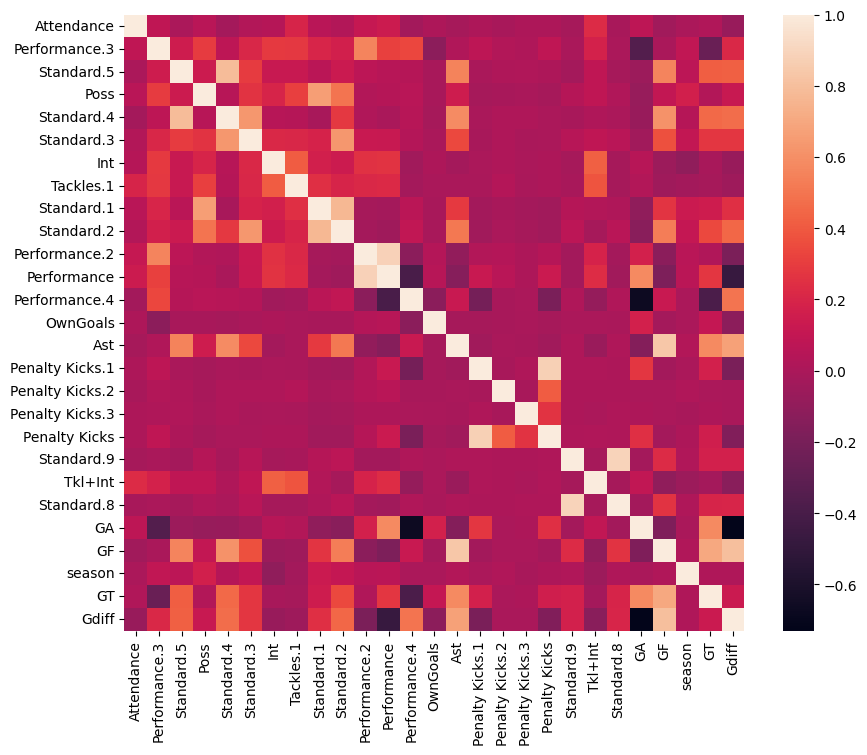

In [61]:
plt.figure(figsize = (10,8))
sns.heatmap(matrix)

На данном этапе как целевые переменные будет рассматривать Gdiff (в дальнейшем могут быть еще добавлены GT и другие)

In [63]:
matrix['Gdiff'].sort_values(ascending = False)

,Gdiff
Gdiff,1.000000
GF,0.800891
Ast,0.673690
Performance.4,0.496782
Standard.4,0.469968
Standard.2,0.446545
Standard.5,0.419616
Standard.3,0.276281
Standard.1,0.249807
Performance.3,0.209801


Наиболее скоррелированными с переменной Gdiff являются Ast, Performance.4, Performance, Standard.4, Standard.2,Standard.3, Standard.5, Standard.1,Performance.3,Penalty Kicks.1, Standard.8

In [77]:
cols = matrix['Gdiff'].sort_values(ascending = False).apply(abs).sort_values(ascending = False).index[:14]

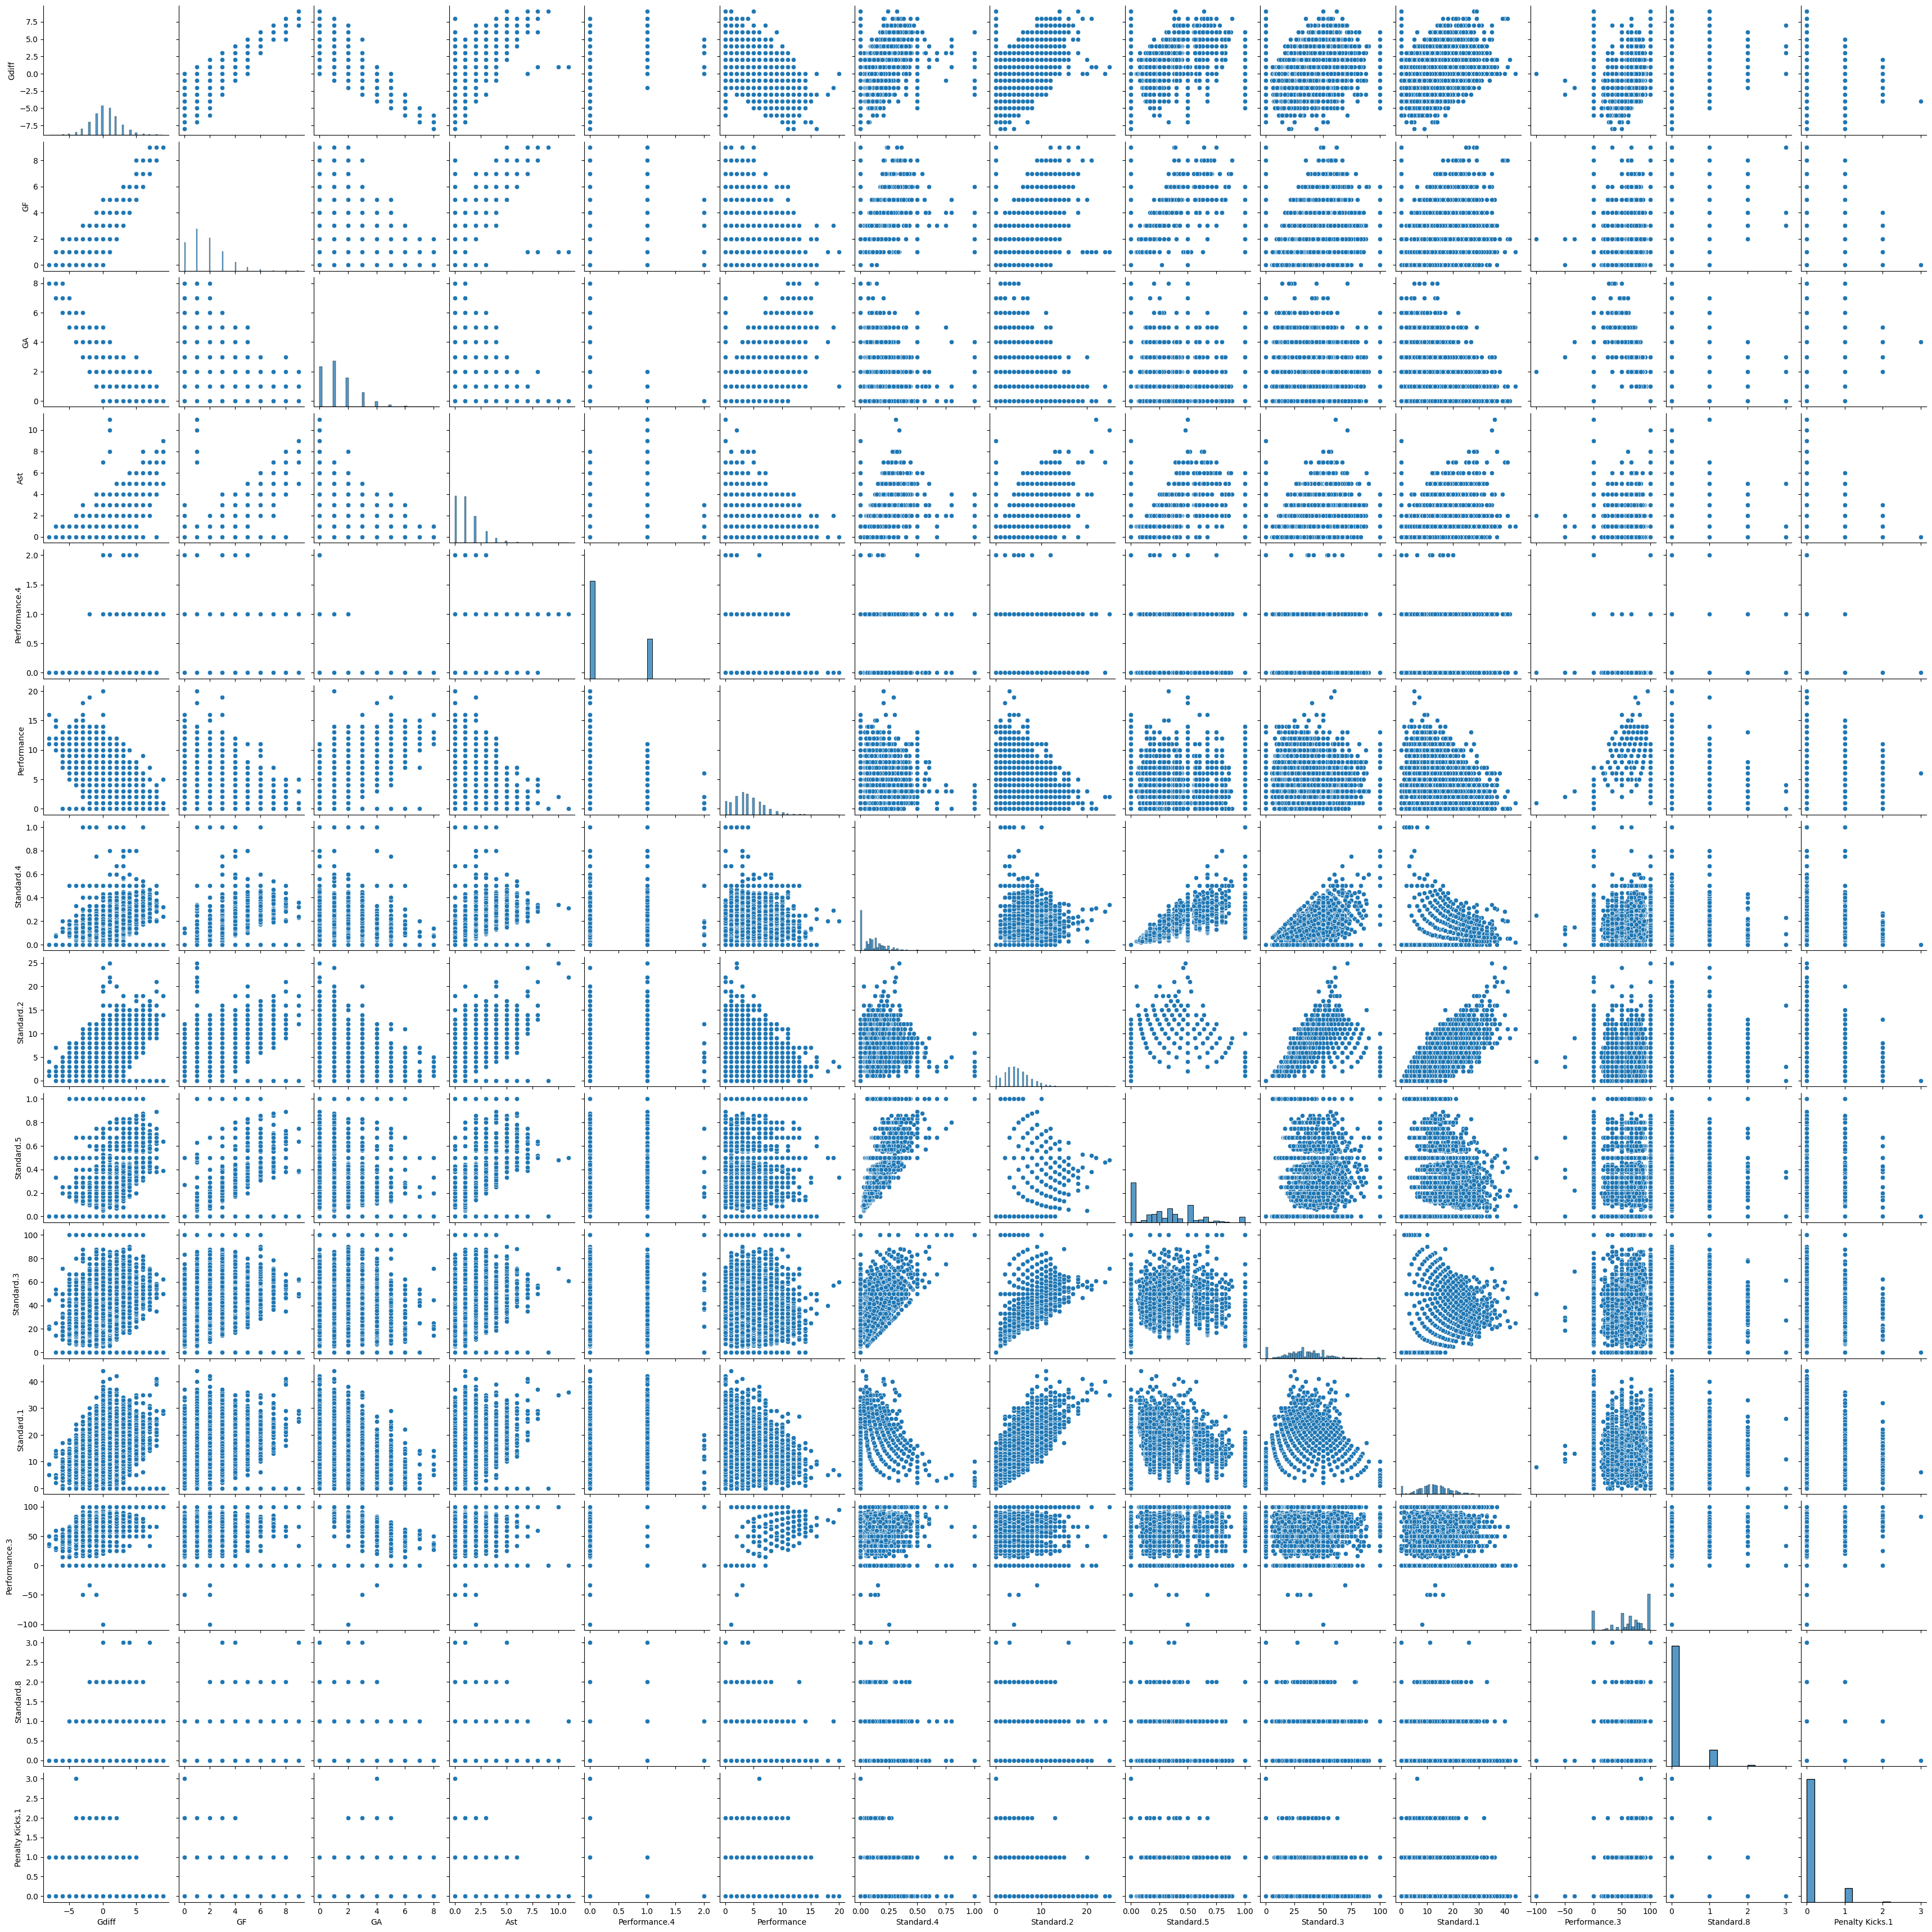

In [78]:
sns.pairplot(matches[cols])

Визуализации

Text(0, 0.5, 'Количество голов')

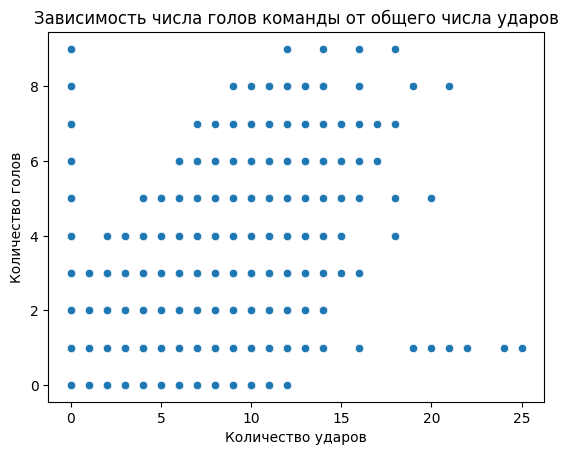

In [79]:
sns.scatterplot(data = matches, x = 'Standard.2',y = 'GF')
plt.title('Зависимость числа голов команды от общего числа ударов')
plt.xlabel('Количество ударов')
plt.ylabel('Количество голов')

In [80]:
matches.groupby(by=['team','venue'])['Gdiff'].sum()

team       venue  
Ajaccio    Away       -1
Alavés     Away        0
           Home        7
Almería    Away       -1
Amiens     Away       -6
                      ..
Wolfsburg  Away      -11
           Home       39
Wolves     Away       14
           Home       30
           Neutral    -1
Name: Gdiff, Length: 337, dtype: int64

Text(0, 0.5, 'Разница (GF - GA)')

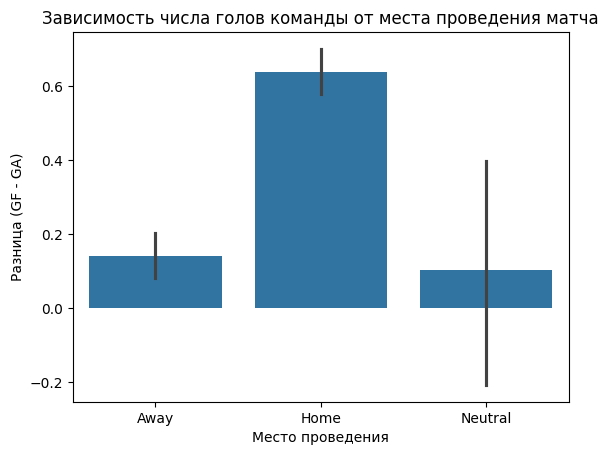

In [86]:
sns.barplot(data = matches, x = 'venue', y = 'Gdiff')
plt.title('Зависимость числа голов команды от места проведения матча')
plt.xlabel('Место проведения')
plt.ylabel('Разница (GF - GA)')

Text(35285.80839821242, 0.5, 'Разница между голами')

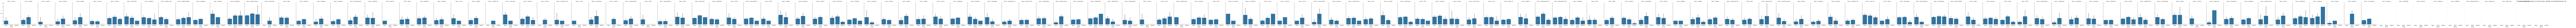

In [81]:
sns.catplot(
    data=matches, x="venue", y="GF", col="team",
    kind="bar", height=4, aspect=.6,
)
plt.title('Исходы матча в зависимости от места игры - дома/в гостях/нейтральная тер')
plt.xlabel('Место')
plt.ylabel('Разница между голами')

Text(0, 0.5, 'Tackles + Interceptions')

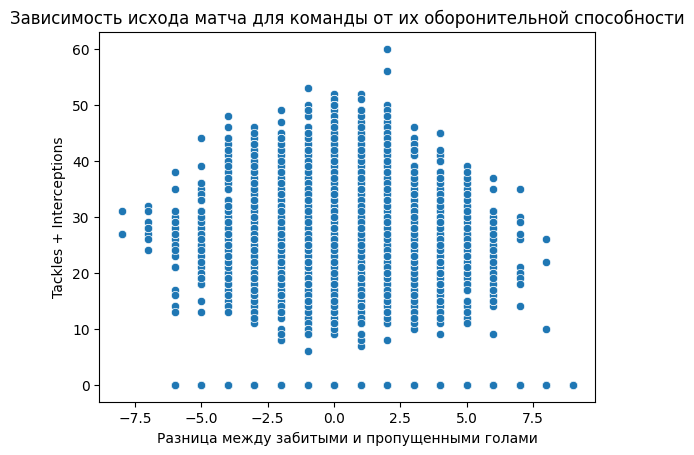

In [88]:
sns.scatterplot(data=matches, x = 'Gdiff', y = 'Tkl+Int')
plt.title('Зависимость исхода матча для команды от их оборонительной способности')
plt.xlabel('Разница между забитыми и пропущенными голами')
plt.ylabel('Tackles + Interceptions')

In [87]:
matches.groupby(by = "Referee")[['GT','Penalty Kicks']].mean().sort_values(by='Penalty Kicks', ascending = False)

,GT,Penalty Kicks
Referee,,
Luca Massimi,2.000000,1.0
Aleksandrs Anufrijevs,2.000000,1.0
Alexandre Boucaut,2.000000,1.0
Luigi Pillitteri,3.000000,1.0
Constantin Colțescu,4.000000,1.0
...,...,...
Michael Salisbury,3.071429,0.0
Michael Tykgaard,1.000000,0.0
Michal Očenáš,1.000000,0.0


In [89]:
matches.to_csv("teams_matches_stats.csv")

In [90]:
np.transpose(matches.describe(include = 'all'))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attendance,9745.0,NaN,NaN,NaN,28944.449461,23382.785037,0.0,8000.0,26000.0,47069.0,98299.0
Performance.3,9745.0,NaN,NaN,NaN,63.141293,32.976173,-100.0,50.0,66.7,100.0,100.0
Standard.5,9745.0,NaN,NaN,NaN,0.293127,0.261213,0.0,0.0,0.25,0.5,1.0
Poss,9745.0,NaN,NaN,NaN,49.270703,16.924304,0.0,42.0,52.0,60.0,87.0
Standard.4,9745.0,NaN,NaN,NaN,0.1127,0.120143,0.0,0.0,0.09,0.17,1.0
Standard.3,9745.0,NaN,NaN,NaN,33.793874,17.719791,0.0,23.1,33.3,44.4,100.0
offside,9745,12,1,2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crosses,9745,62,0,617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fouls_drw,9745,30,11,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fouls_com,9745,30,12,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
